In [160]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression

### Steps in simple linear regression

1. Reading and understanding the data
2. Training and fitting the model
3. Residual analysis

In [3]:
advertising = pd.read_csv("advertising.csv")
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
advertising.shape


(200, 4)

In [9]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


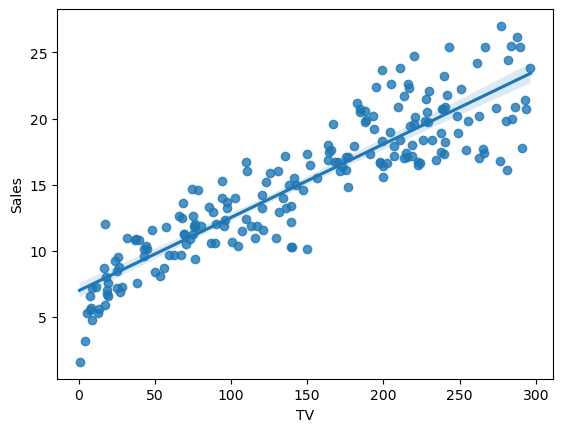

In [17]:
sns.regplot(x='TV',y='Sales',data=advertising)
plt.show()

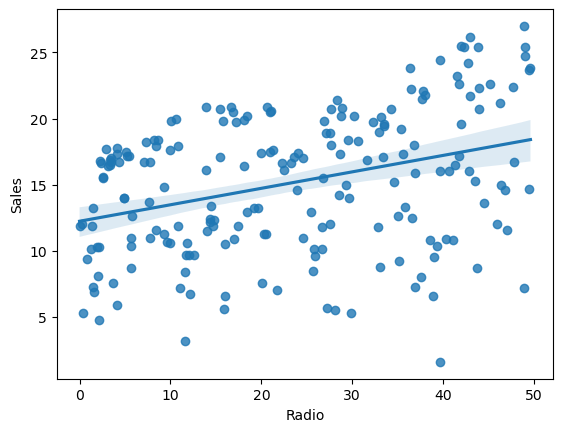

In [19]:
sns.regplot(x='Radio',y='Sales',data=advertising)
plt.show()

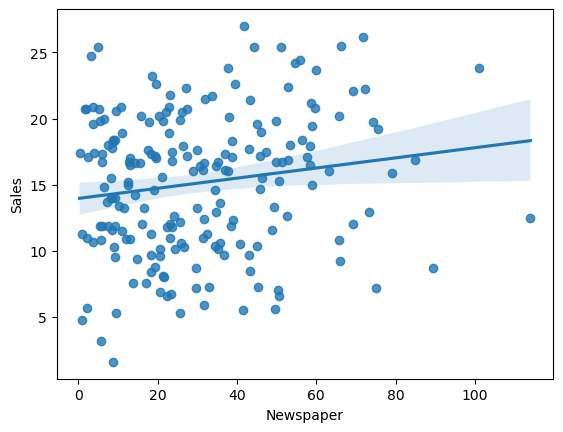

In [21]:
sns.regplot(x='Newspaper',y='Sales',data=advertising)
plt.show()

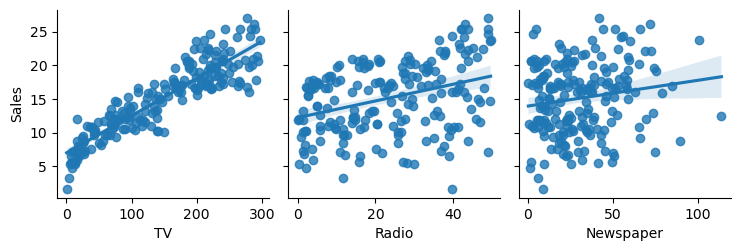

In [25]:
sns.pairplot(x_vars=['TV','Radio','Newspaper'],y_vars='Sales',data=advertising,kind='reg')
plt.show()

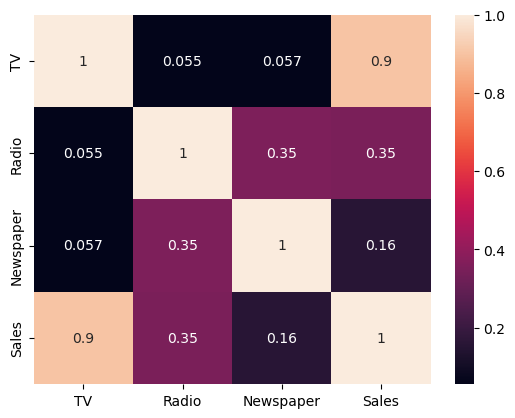

In [33]:
corr = advertising.corr();
sns.heatmap(corr,annot=True)
plt.show()

---
## Performing Simple Linear Regression

Equation of linear regression<br>
$y = c + m_1x_1 + m_2x_2 + ... + m_nx_n$

-  $y$ is the response
-  $c$ is the intercept
-  $m_1$ is the coefficient for the first feature
-  $m_n$ is the coefficient for the nth feature<br>

In our case:

$y = c + m_1 \times TV$

The $m$ values are called the model **coefficients** or **model parameters**.

---

### Generic Steps in model building using `statsmodels`

We first assign the feature variable, `TV`, in this case, to the variable `X` and the response variable, `Sales`, to the variable `y`.

In [47]:
# create x and y values

X = advertising['TV']
y = advertising.Sales

In [51]:
# train-test split

X_train,X_test,y_train,y_test= train_test_split(X,y,train_size=0.70,random_state=100)

X_train.shape

(140,)

In [53]:
X_test.shape

(60,)

In [55]:
y_train.shape

(140,)

In [57]:
X_train

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
       ...  
87     110.7
103    187.9
67     139.3
24      62.3
8        8.6
Name: TV, Length: 140, dtype: float64

In [61]:
# Train the model using statsmodel

X_train_sm= sm.add_constant(X_train)

X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [63]:
# y= c + M * TV
# y = c * const + M * TV

In [85]:
help(sm.OLS)

Help on class OLS in module statsmodels.regression.linear_model:

class OLS(WLS)
 |  OLS(endog, exog=None, missing='none', hasconst=None, **kwargs)
 |
 |  Ordinary Least Squares
 |
 |  Parameters
 |  ----------
 |  endog : array_like
 |      A 1-d endogenous response variable. The dependent variable.
 |  exog : array_like
 |      A nobs x k array where `nobs` is the number of observations and `k`
 |      is the number of regressors. An intercept is not included by default
 |      and should be added by the user. See
 |      :func:`statsmodels.tools.add_constant`.
 |  missing : str
 |      Available options are 'none', 'drop', and 'raise'. If 'none', no nan
 |      checking is done. If 'drop', any observations with nans are dropped.
 |      If 'raise', an error is raised. Default is 'none'.
 |  hasconst : None or bool
 |      Indicates whether the RHS includes a user-supplied constant. If True,
 |      a constant is not checked for and k_constant is set to 1 and all
 |      result stati

In [69]:
# fitting the model
# ordinary least squares (OLS)

lr=sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()

lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [71]:
# sales = 6.948+0.0545*TV

In [73]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Thu, 10 Oct 2024   Prob (F-statistic):           1.52e-52
Time:                        12:18:13   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
# if P value is very low(0.001) is considered very low. This means that the model is very confident 

In [ ]:
# R-squared is 0.816 that means 81 percentage of variance in sales is explained by TV
# the prob(f-statistic) is low which means that the fit is not by chance 

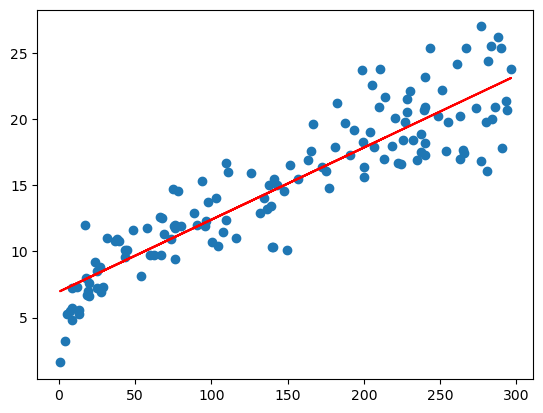

In [83]:
plt.scatter(X_train,y_train)
plt.plot(X_train,6.9487+0.0545 * X_train,'r')
plt.show()

### Residual analysis

In [93]:
### assumption is that residuals should be normally distributed
### the below error terms are normally distributed

In [97]:
# error = f(y_train - y_train_pred)
# y_train_pred = 6.9487+0.0545 * X_train

In [99]:
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred

74     18.588747
3      15.212365
185    18.130563
26     14.743271
90     14.274178
         ...    
87     12.986898
103    17.197830
67     14.546907
24     10.346884
8       7.417777
Length: 140, dtype: float64

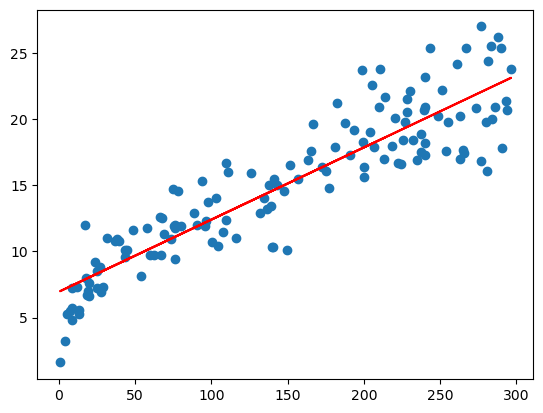

In [101]:
plt.scatter(X_train,y_train)
plt.plot(X_train,y_train_pred,'r')
plt.show()

In [103]:
# res variable
res = y_train-y_train_pred


C:\Users\manik\AppData\Local\Temp\ipykernel_17872\699558879.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(res)


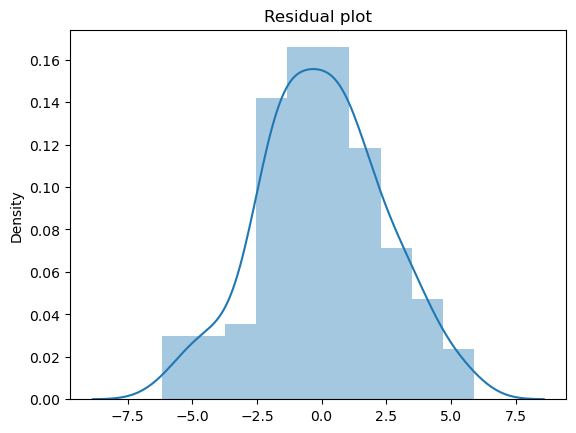

In [111]:
# plot the residuals

plt.figure()
sns.distplot(res)
plt.title('Residual plot')
plt.show()

In [115]:
## the above residual hist plot is following a nearly normally distributed plot and centered at 0.00 hence 
## we can conclude that fundamental assumption of linear regression is actually respected 

In [121]:
## next step: look for patterns 
## if it is a fit statistic we should not be able to identify a pattern

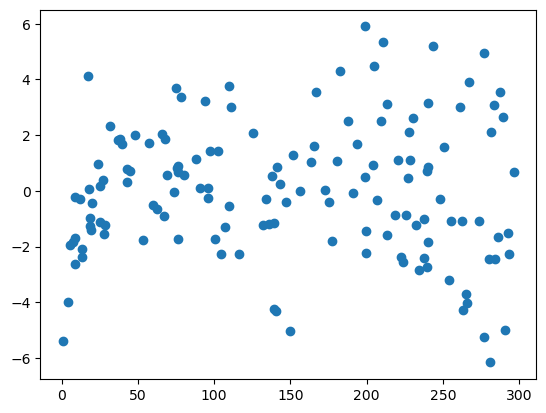

In [125]:
plt.scatter(X_train,res)
plt.show()

## Predictions and Evaluation on the Test set

In [128]:
# 1. WE have a train model, use it to prediction on the test set(y_test_pred)
# Evaluate the model, r-squareed, on the test

In [132]:
# prediction on the test model
X_test_sm =sm.add_constant(X_test)
y_test_pred = lr_model.predict(X_test_sm)
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

In [138]:
r2 = r2_score(y_true=y_test,y_pred=y_test_pred)
r2

0.7921031601245658

In [140]:
r2_score(y_true=y_train,y_pred=y_train_pred)


0.8157933136480389

In [ ]:
## if the prediction is around 5% of the 81% then it is considered to be right fit

In [142]:
# mean square error
mean_squared_error(y_true=y_test,y_pred=y_test_pred)

4.077556371826956

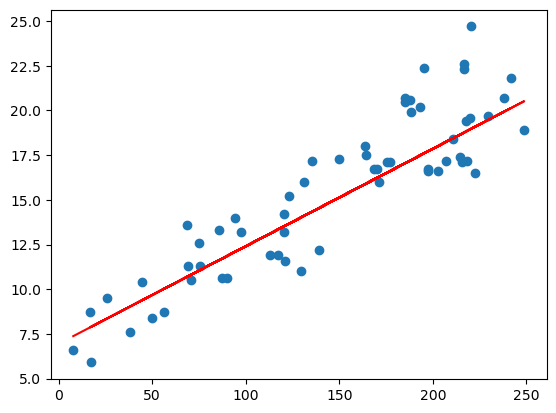

In [144]:
plt.scatter(X_test,y_test)
plt.plot(X_test,y_test_pred,'r')
plt.show()

# Learn linear regression model using SKLearn

In [150]:
# train test split

X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.70,random_state=100)

In [152]:
X_train.shape

(140,)

In [156]:
X_test.shape

(60,)

## Steps in sklearn

1. create an object of linear regression
2. fit the model
3. see the params, make predictions(train, test)
4. Evaluate (compute r2,etc)

In [162]:
lm= LinearRegression()
#lm.fit(X_train,y_train)

ValueError: Expected a 2-dimensional container but got <class 'pandas.core.series.Series'> instead. Pass a DataFrame containing a single row (i.e. single sample) or a single column (i.e. single feature) instead.

In [167]:
#reshape X_train to 140, to 140,1

X_train_lm = X_train.values.reshape(-1,1)
X_test_lm= X_test.values.reshape(-1,1)

In [171]:
# fit the model
lm.fit(X_train_lm,y_train)


LinearRegression()

In [175]:
# coeffient (m1) is given
lm.coef_

array([0.05454575])

In [177]:
# intercept
lm.intercept_

6.9486832000013585

In [179]:
# make predictions 

y_train_pred= lm.predict(X_train_lm)
y_test_pred=lm.predict(X_test_lm)

In [185]:
# 4. evaluate the model

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))


0.8157933136480388
0.792103160124566
